<a href="https://colab.research.google.com/github/psuarezserrato/aprendizaje-geometrico/blob/main/Tutorial_y_Ejemplos_en_Geometr%C3%ADa_de_Poisson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instalación

Para instalar nuestros módulos de Geometría de Poisson, debemos hacerlo vía `pip` 

In [1]:
!pip install poissongeometry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install numericalpoissongeometry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se puede acceder al código fuente de nuestros módulos en las siguiente referencias [PoissonGeometry](https://github.com/appliedgeometry/poissongeometry) y [NumericalPoissonGeometry](https://github.com/appliedgeometry/NumericalPoissonGeometry).     

### Sintaxis

* Una función escalar en `PoissonGeometry` se escribe usando *expresiones de cadena*.

    Por ejemplo, la función $f:\mathbf{R}^{3} \to \mathbf{R}$ dada por
    
    $$f(x_1,x_2,x_3) = ax_1^2 + bx_2^2 + cx_3^2, \quad a,b,c \in \mathbf{R}$$
    
    se debe escribir como:
```
"a*x1**2 + b*x2**2 + c*x3**2"
```
Aquí, `x1, x2, x3` son variables simbólicas que `PoissonGeometry` define por defecto y que representan en este caso las coordenadas $(x_1,x_2,x_3)$.

    **Observación.** Todos los caracteres que no son coordenadas locales se tratan como parámetros (simbólicos). Por ejemplo `a`, `b`, `c` en la expresión anterior.

    **Nota.** Python admite las siguientes operaciones básicas:

| Expression | Description  || Expression | Description    |
| :--------: | ------------ || :--------: | -------------- |
| +          | Suma         || *          | Multiplicación |
| -          | Resta        || **         | Potencia |
| /          | División     ||

* Un campo multivectorial o una forma diferencial en `Poisson Geometry` se escriben usando *diccionarios* con *tuplas de enteros* como **claves** y *expresiones de cadena* como **valores**. 

    Por ejemplo, en $\mathbf{R}^{3}$: 
    * El campo vectorial $x_1\frac{\partial}{\partial x_1} + x_2\frac{\partial}{\partial x_2} + x_3 \frac{\partial}{\partial x_3}$ debe escribirse como \\
```{(1,):'x1', (2,):'x2', (3,):'x3'}```

    * El campo bivectorial $x_1\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_2} - x_2\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_3} + x_3 \frac{\partial}{\partial x_2}\wedge \frac{\partial}{\partial x_3}$ debe escribirse como \\
```{(1,2):'x1', (1,3):'-x2', (2,3):'x3'}```

    * El 3-campo multivectorial $x_1\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_2}\wedge \frac{\partial}{\partial x_3}$ debe escribirse como \\
```{(1,2,3):'x1'}```

**Observaciones:**
1. En `Python`, a una variable \\
```{key_1: value_1, ..., key_n: value_n}``` \\
se le llama 'diccionario'. Cada `key_1,...,key_n` es llamada una *llave* del diccionario y cada `value_1,...,value_n` el *valor* de la correspondiente llave.

2. En nuestro caso, cada clave es una variable de tipo `tupla` y cada valor una variable de tipo `cadena (string)'. 

    Si tenemos un multivector $A$ de grado $a$ en $\mathbf{R}^{m}$ $$A = \sum_{1 \leq i_1 < i_2 < \cdots < i_a \leq m} A^{i_1 i_2 \cdots i_a}\,\frac{\partial}{\partial{x_{i_1}}} \wedge \frac{\partial}{\partial{x_{i_2}}} \wedge \cdots \wedge \frac{\partial}{\partial{x_{i_a}}},$$ \\

    las llaves del diccionario deben ser tuplas $(i_1,i_2,\ldots,i_a)$ que corresponden a los índices ordenados $i_1 i_2 \cdots i_a$ de $A^{i_1 i_2 \cdots i_a}$ y los valores la correspondiente expressión de cadena del coeficiente (función escalar) $A^{i_1 i_2 \cdots i_a}$.

    **Nota.** Podemos escribir solamente las claves y valores de los *coeficientes no nulos*.

3. Podemos cambiar el orden de los índices en cada tupla añadiendo el signo menos en el correspondiente valor. 

    Por ejemplo,
    
    * El campo bivectorial $x_1\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_2}$ se puede escribir \\
    ```{(1,2): 'x1'}```
    
        o como

        ```{(2,1): '-x1'}```

     donde este último diccionario corresponde al campo bivectorial $-x_1\frac{\partial}{\partial x_2}\wedge \frac{\partial}{\partial x_1}$.

     **Nota.** Aunque tenemos la opción de ignorar el orden de los índices, recomendamos no hacerlo para evitar posibles errores de cálculo.

4. La sintaxis para formas diferenciales es la misma que para campos multivectoriales.

    Por ejemplo, la 2-forma diferencial en $\mathbf{R}^4$ 
    
    $$-\mathrm{d}x_{1} \wedge \mathrm{d}x_{2} - (x_1 + x_4)\mathrm{d}x_{3} \wedge \mathrm{d}x_{4}$$ 
    
    puede escribirse como \\
```{(1,2):'-1', (3,4): '-(x1 + x4)'}```

5. Finalmente, en `PoissonGeometry` se usa la siguiente notación:
    *   `Dxi` es equivalente a $\frac{\partial}{\partial x_{i}}$. 
    *   `dxi` es qeuivalente a  $\mathrm{d}x_{i}$.

 Esta asignación se da porque en `SymPy` no es posible definir variables $\frac{\partial}{\partial x_{i}}$ o $\mathrm{d}x_{i}$.

### Ejemplos 

In [3]:
# Importamos el modulo PoissonGeometry usando el alias pg 
from poisson.poisson import PoissonGeometry as pg
# Definimios una instancia del módulo, para trabajar en dimensión 2 con la variable simbólica x (por defecto) 
pg2 = pg(2)

# Importamos el modulo NumPoissonGeometry usando el alias npg 
from numpoisson.numpoisson import NumPoissonGeometry as npg
# Definimios una instancia del módulo, para trabajar en dimensión 2, con la variable simbólica x
npg2 = npg(2, variable="x")

# Campos Vectoriales

Definamos el siguiente campo vectorial
$$\pi = (x_{1} + x_{2})\frac{\partial}{\partial x_{1}}\wedge\frac{\partial}{\partial x_{2}}$$
que se escribe en nuestra sintaxis como: 

In [4]:
pi = {(1, 2): 'x1 + x2'}

# Formas Diferenciales

Consideramos la forma simpléctica estándar en $R^{2}$
$$\omega = dx_{1}\wedge dx_{2}$$ 
que se escribe en nuestra sintaxis de la siguiente forma:

In [5]:
omega = {(1, 2): '1'}

# Creación de Mallas para Evaluaciones

Para evaluar los objectos anteriores, necesitamos crear mallas como arreglos de `numpy` como sigue: 

In [6]:
import numpy
# Donde 10**2 indica la cantidad de vectores a crear y 2 es la longitud del vector
M = numpy.random.rand(10**4, 2)
# M = numpy.random.randint(3, size=(10**3, 2))
# Mostramos la malla
M

array([[0.64010053, 0.8701712 ],
       [0.53014396, 0.29947805],
       [0.05439726, 0.4165119 ],
       ...,
       [0.8853412 , 0.7601852 ],
       [0.82620334, 0.77084164],
       [0.76694216, 0.80217863]])

## Evaluar una malla en un bivector

Para evaluar el bievctor $\pi$ sobre la malla $M$ ejecutamos (El resultado por defecto es un arreglo de `numpy`)

In [7]:
npg2.num_bivector(pi, M)

array([[[ 0.        ,  1.51027173],
        [-1.51027173,  0.        ]],

       [[ 0.        ,  0.82962201],
        [-0.82962201,  0.        ]],

       [[ 0.        ,  0.47090916],
        [-0.47090916,  0.        ]],

       ...,

       [[ 0.        ,  1.64552639],
        [-1.64552639,  0.        ]],

       [[ 0.        ,  1.59704498],
        [-1.59704498,  0.        ]],

       [[ 0.        ,  1.56912079],
        [-1.56912079,  0.        ]]])

Para producir el mismo resultado en un arreglo de `pytorch` ejecutamos

In [8]:
npg2.num_bivector(pi, M, torch_output=True)

tensor([[[ 0.0000,  1.5103],
         [-1.5103,  0.0000]],

        [[ 0.0000,  0.8296],
         [-0.8296,  0.0000]],

        [[ 0.0000,  0.4709],
         [-0.4709,  0.0000]],

        ...,

        [[ 0.0000,  1.6455],
         [-1.6455,  0.0000]],

        [[ 0.0000,  1.5970],
         [-1.5970,  0.0000]],

        [[ 0.0000,  1.5691],
         [-1.5691,  0.0000]]], dtype=torch.float64)

Para producir el mismo resultado en un arreglo de `tensorflow` ejecutamos

In [9]:
npg2.num_bivector(pi, M, tf_output=True)

<tf.Tensor: shape=(10000, 2, 2), dtype=float64, numpy=
array([[[ 0.        ,  1.51027173],
        [-1.51027173,  0.        ]],

       [[ 0.        ,  0.82962201],
        [-0.82962201,  0.        ]],

       [[ 0.        ,  0.47090916],
        [-0.47090916,  0.        ]],

       ...,

       [[ 0.        ,  1.64552639],
        [-1.64552639,  0.        ]],

       [[ 0.        ,  1.59704498],
        [-1.59704498,  0.        ]],

       [[ 0.        ,  1.56912079],
        [-1.56912079,  0.        ]]])>

Y cuando es posible podemos producir el bivector en formato diccionario dentro de un arreglo de `numpy`  

In [10]:
npg2.num_bivector(pi, M, dict_output=True)

array([{(1, 2): 1.5102717262377205}, {(1, 2): 0.8296220129627535},
       {(1, 2): 0.4709091577062011}, ..., {(1, 2): 1.6455263928712773},
       {(1, 2): 1.5970449754622433}, {(1, 2): 1.5691207924771267}],
      dtype=object)

Verifiquemos que $\pi$ es un bivector de Poisson 

In [11]:
pg2.is_poisson_bivector(pi)

True

Consideremos las siguientes funciones $f=x_{1}^{2} + x_{2}^{2}\,$,  $\, g=x_{1} + x_{2}$

In [12]:
# Las funciones f,g se escriben en la sintaxis de Python
f = "x1**2+x2**2" 
g = "x1+x2"

Calculamos el corchete de Poisson $\{f, g\}_{\pi}$ de la siguiente forma

In [13]:
pg2.poisson_bracket(pi, f, g)

'-2*x1*(-x1 - x2) - 2*x2*(x1 + x2)'

Podemos obtener el resultado en formato de $\LaTeX{}$

In [14]:
pg2.poisson_bracket(pi, f, g, latex=True)

'- 2 x_{1} \\left(- x_{1} - x_{2}\\right) - 2 x_{2} \\left(x_{1} + x_{2}\\right)'

Para calcular el campo hamiltoniano $X_{f}$ respecto a $\pi$ ejecutamos

In [15]:
X_f = pg2.hamiltonian_vf(pi, f)
X_f

{(1,): '-2*x2*(x1 + x2)', (2,): '-2*x1*(-x1 - x2)'}

Podemos obtener el resultado en formato de $\LaTeX{}$

In [16]:
pg2.hamiltonian_vf(pi, f, latex=True)

'\\left\\{ \\left( 1,\\right) : - 2 x_{2} \\left(x_{1} + x_{2}\\right), \\  \\left( 2,\\right) : - 2 x_{1} \\left(- x_{1} - x_{2}\\right)\\right\\}'

Por el resultado anterior vemos que el campo $X_{f}$ tiene la expresión:

$$X_{f} = - 2 x_{2} \left(x_{1} + x_{2}\right)\frac{\partial}{\partial x_{1}} - 2 x_{1} \left(- x_{1} - x_{2}\right)\frac{\partial}{\partial x_{2}}.$$

Nuestra sintaxis usando diccionarios es de la forma, 

$$X_{f} = \left\{\left( 1,\right) : - 2 x_{2} \left(x_{1} + x_{2}\right), \  \left( 2,\right) : - 2 x_{1} \left(- x_{1} - x_{2}\right)\right\}.$$ 

Podemos evaluar $X_{f}$ en la malla $M$ ejecutamos:

In [17]:
X_f_eval = npg2.num_hamiltonian_vf(pi, f, M)
X_f_eval

array([[[-2.62838992],
        [ 1.93345146]],

       [[-0.49690717],
        [ 0.8796382 ]],

       [[-0.39227854],
        [ 0.05123233]],

       ...,

       [[-2.50180961],
        [ 2.91370461]],

       [[-2.46213753],
        [ 2.63896777]],

       [[-2.51743034],
        [ 2.40684978]]])

Gráficamos el campo vectorial $X_{f}$ 

Ejemplo en 2D con `matplotlib`

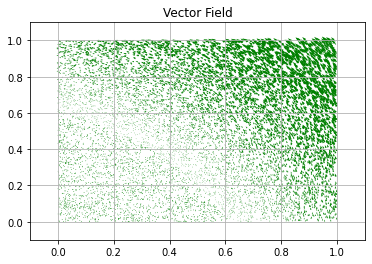

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 

# Selecionamos solo las primeras 100 entradas de la matriz  
#_M = M[:100]  
#_X_f_eval = X_f_eval[:100]
x, y = M[:,0], M[:,1]
u = numpy.array([i[0] for i in X_f_eval[:,0]])
v = numpy.array([i[0] for i in X_f_eval[:,1]])
  
plt.quiver(x, y, u, v, color='g') 
plt.title('Vector Field') 
  
plt.xlim(-0.1, 1.1) 
plt.ylim(-0.1, 1.1) 
  
plt.grid() 
plt.show()

Ejemplo en 3D con `plotly`

In [19]:
import plotly.graph_objects as go
import pandas as pd

# Definimos los valores para la parte x e y 
x, y = M[:,0], M[:,1]
u = numpy.array([i[0] for i in X_f_eval[:,0]])
v = numpy.array([i[0] for i in X_f_eval[:,1]])
# Agregamos los arreglos con valor a cero para la parte z por que el campo vectrial vive en R^{2}
z = numpy.zeros(shape=x.shape)
w = numpy.zeros(shape=u.shape)

fig = go.Figure(
    data=go.Cone(
      x = x.tolist(),
      y = y.tolist(),
      z = z.tolist(),
      u = u.tolist(),
      v = v.tolist(),
      w = w.tolist(),
      # Puede cambiar la escala de colores ver el siguiente link 
      # https://plotly.com/python/builtin-colorscales/
      colorscale='GnBu',
      sizemode="absolute",
      sizeref=5, # tamaño de los conitos
      anchor="tip"
    )
)

fig.update_layout(
    # Para ver todos los templates disponible ver 
    # https://plotly.com/python/templates/
    template = "plotly_dark",
    title = "Gráfica del campo vectorial X_f_eval",
    height = 1000, # el tamaño es en pixeles (px)
)
fig.show()

## **Campos Modulares**

Sea $P$ una variedad de Poisson con el tensor de Poisson $\pi$, y elija una
densidad positiva y suave $\mu$ en $P$.  A estos datos asociamos el operador
$\phi _{mu }:f\mapsto {\rm div}_{mu }H_{f}$, donde $H_{f}$ es el
campo vectorial hamiltoniano de $f$, y la
divergencia ${\rm div}_{mu }\xi $ de un campo vectorial $\xi $ es la 
función $ {\cal L}_{\xi}\mu/\mu$. (${\cal L}_{\xi }$ es la derivada de Lie
derivada de Lie por $ \xi $). 

 Aunque $\phi$
parece ser un operador de segundo orden (una especie de
laplaciano), un simple cálculo utilizando la antisimetría del
tensor de Poisson muestra que $\phi _{\mu }$ es de hecho una
derivación y, por tanto, un campo vectorial; lo llamamos el  
**campo vectorial modular** de $(P,\pi)$ con respecto a la densidad
$\mu$. 

 Un cálculo más detallado muestra que ${\cal L}_{\phi_{\mu}}\mu $
y ${\cal L}_{\phi_{\mu}}\pi $ son ambos cero.

El campo vectorial modular $\phi _{mu}$ es cero precisamente cuando
$\mu $ es una densidad invariante para los flujos de todos los campos vectoriales hamiltonianos.  En este caso, basta con referirse a $\mu $ como una **densidad invariante** para la variedad de Poisson, y
decimos que la variedad de Poisson es **unimodular**.

Si sustituimos $\mu$ por $a\mu$, donde $a$ es una
función positiva, el campo vectorial modular se convierte en $\phi _{a\mu
}=\phi _{\mu }+ H_{-\log a}$. 


 Concluimos
que el campo vectorial modular está bien definido modulo
hamiltonianos.  Es decir, el conjunto de 
campos vectoriales modulares para todas las posibles densidades positivas es un
elemento de 
el primer espacio de cohomología de Poisson de $P$ (campos vectoriales
campos vectoriales de Poisson modulo campos vectoriales hamiltonianos). 

Se le llama la **clase modular** de la variedad de Poisson.  Se anula sólo en variedades de Poisson unimodulares.


Considere el campo bivectorial en $\mathbf{R}^{4}$

$$\Pi = 2x_{4}\frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_3} + 2x_{3} \frac{\partial}{\partial x_1}\wedge \frac{\partial}{\partial x_4} - 2x_{4} \frac{\partial}{\partial x_2}\wedge \frac{\partial}{\partial x_3} + 2x_{3} \frac{\partial}{\partial x_2}\wedge \frac{\partial}{\partial x_4} + (x_{1}-x_{2}) \frac{\partial}{\partial x_3}\wedge \frac{\partial}{\partial x_4}.$$ 

Este campo bivectorial de Poisson surge en el análisis de la estabilidad orbital del oscilador de Pais-Uhlenbeck en $\mathbf{R}^{4}$ (Ver M. Avendaño-Camacho, J. A. Vallejo and Yu. Vorobiev, A Perturbation Theory Approach to the Stability of the Pais-Uhlenbeck Oscillator, J. Math. Phys. 58, (2017)). 

La función `modular_vf` calcula el campo modular de $\Pi$ respecto a una forma de volumen $f\Omega_{0}$ en $\mathbf{R}^4$ ( aquí $f$ es una función no nula y $\Omega_{0}$ es la forma de volumen euclidiana en $\mathbf{R}^4$ )

<!--
Como vimos anteriormente, $\Pi$ tiene campo modular trivial relativo a la forma de volumen euclídea en $\mathbb{R}^{4}$, por tanto, es un campo bivectorial de Poisson unimodular en $\mathbb{R}^{4}$. Podemos verificar esto con:
-->

In [20]:
from poisson.poisson import PoissonGeometry
pg4 = PoissonGeometry(4)

bivector ={(1,3):'2*x4', (1,4): '2*x3', (2,3): '-2*x4', (2,4): '2*x3', (3,4):'x1-x2'}
pg4.modular_vf(bivector, 1)

{}

Por tanto, en este caso el campo modular de $\Pi$ respecto a la forma de volumen euclídea es trivial.

__Nota__: La segunda entrada para la función `modular_vf`, en este ejemplo `1`, puede tomar cualquier función real $f$ para modificar la forma del volumen.

In [21]:
pg4.is_unimodular_homogeneous(bivector)

True

Lo anterior también se puede verificar numericamente, con mallas generadas aleatoriamente.   

In [22]:
from numpoisson.numpoisson import NumPoissonGeometry as npg
npg4 = npg(4, variable="x")

# (106,4) numpy array with random samples from a uniform distribution over [0,1)
M = numpy.random.rand(10**6, 4)

# run modular vf method with torch output flag
npg4.num_modular_vf(bivector, 1, M, torch_output=True)

tensor([], dtype=torch.float64)

In [23]:
npg4.num_modular_vf(bivector, 1, M, tf_output=True)

<tf.Tensor: shape=(0,), dtype=float64, numpy=array([], dtype=float64)>

In [24]:
npg4.num_modular_vf(bivector, 1, M)

array([], dtype=float64)

El arreglo vacío quiere decir que el resultado son matrices que todos sus valores son ceros.

La definición de la clase modular de una variedad de Poisson apareció por primera vez en 1985 en el trabajo de Koszul, que no le dio un nombre.


 Posteriormente, en el trabajo de Weinstein se demostró la relación de esta noción con el grupo de automorfismos modulares de las álgebras de von Neumann, de ahí el nombre que propuso, demostró muchas propiedades de los campos vectoriales modulares de las variedades de Poisson.


La clase modular de una variedad de Poisson es el obstáculo para la existencia de una densidad invariante bajo los flujos de todos los campos vectoriales hamiltonianos.

### Más ejemplos (Fibraciones de Lefschetz Quebradas)

Veamos un par de ejemplos que aparecen en el estudio de fibraciones de Lefschetz quebradas en variedades de dimensión 4 (ver [Poisson structures on wrinkled fibrations](https://link.springer.com/article/10.1007/s40590-015-0072-8),  J. Torres Orozco, P. Suárez-Serrato, Bulletin of the Mexican Mathematical Society, 22, No.1 (2016), 263-280). 

Considere el bivector de Poisson definido cerca de una singularidad de *cúspide* 

$$\pi = 2x_{3} \frac{\partial}{\partial x_{1}}\wedge \frac{\partial}{\partial x_{2}} + 2x_{2} \frac{\partial}{\partial x_{1}}\wedge \frac{\partial}{\partial x_{3}} + (3x_{4} - 3x_{1}^{2}) \frac{\partial}{\partial x_{2}}\wedge \frac{\partial}{\partial x_{3}} $$

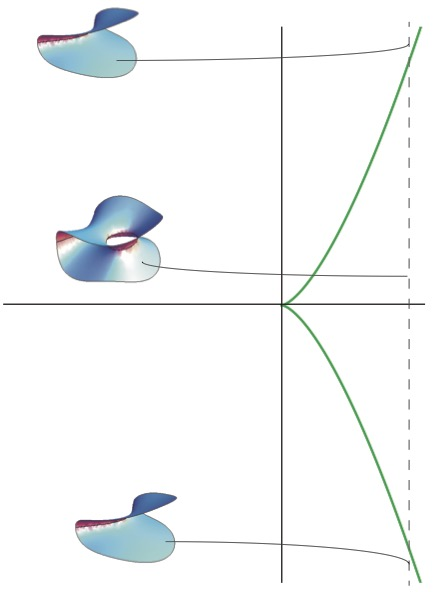


In [25]:
from poisson.poisson import PoissonGeometry
pg4 = PoissonGeometry(4)

pi ={(1,2):'2*x3', (1,3): '2*x2', (2,3): '(3*x4 - 3*x1**2)'}
h = "x1 + x2 + x3 + x4"

pg4.hamiltonian_vf(pi, h)

{(1,): '-2*x2 - 2*x3',
 (2,): '3*x1**2 + 2*x3 - 3*x4',
 (3,): '-3*x1**2 + 2*x2 + 3*x4'}

El resultado anterior se traduce al campo vectorial siguiente: 

$$X_{f} = (-2x_{2} - 2x_{3})\frac{\partial}{\partial x_{1}} + (3x_{1}^{2} + 2x_{3} - 3x_{4})\frac{\partial}{\partial x_{2}} + (-3x_{1}^{2} + 2x_{2} + 3x_{4})\frac{\partial}{\partial x_{3}} $$

Considere el bivector de Poisson definido cerca de una familia uniparamétrica de singularidades de *creación* (respecto al parámetro $s$) 

$$\pi_s =  2x_{3}\frac{\partial}{\partial x_{1}}\wedge\frac{\partial}{\partial x_{2}} + 2x_{2} \frac{\partial}{\partial x_{1}}\wedge \frac{\partial}{\partial x_{3}} - 3(s-x_{4}^{2}+x_{1}^{2})\frac{\partial}{\partial x_{2}}\wedge \frac{\partial}{\partial x_{3}}$$

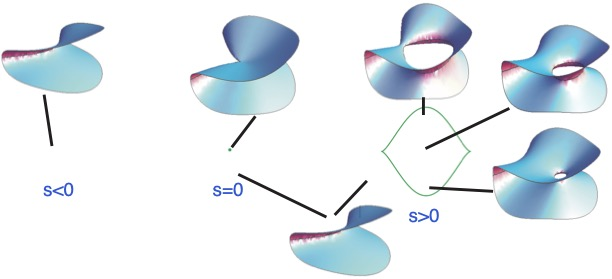

In [26]:
from poisson.poisson import PoissonGeometry
pg4 = PoissonGeometry(4)

pi ={(1,2):'2*x3', (1,3): '2*x2', (2,3): '3*(s - x4**2 + x1**2)'}
h = "x1**2 + x2**2 + x3**2 + x4**2"

pg4.hamiltonian_vf(pi, h)

{(1,): '-8*x2*x3',
 (2,): '4*x1*x3 - 2*x3*(3*s + 3*x1**2 - 3*x4**2)',
 (3,): '4*x1*x2 - 2*x2*(-3*s - 3*x1**2 + 3*x4**2)'}

Lo anterior se traduce al siguiente campo vectorial:

$$ X_{f} = -8x_{2}x_{3}\frac{\partial}{\partial x_{1}} + [4x_{1}x_{3} - 2x_{3}(3s + 3x_{1}^{2} - 3x_{4}^{2})]\frac{\partial}{\partial x_{2}} + [4x_{1}x_{2} - 2x_{2}(-3s - 3x_{1}^{2} + 3x_{4}^{2})]\frac{\partial}{\partial x_{2}}$$


### Foliaciones de Bott-Morse en dimensión 3

Veamos un ejemplo en dimensión 3, para estructuras de Poisson cuya foliación tienen singularidades de tipo Bott-Morse (ver [On Bott-Morse Foliations and their Poisson Structures in Dimension 3](http://www.journalofsing.org/volume19/evangelista-suarez-serrato-torres-orozco-vera.pdf)), M. Evangelista- Alvarado, J. Torres Orozco, P. Suárez-Serrato, R. Vera, Journal of Singularities, Volume 19 (2019), 19-33.  

Consideremos el bivector definido cerca de una sigularidad de Bott-Morse tipo silla y con índice de Morse igual a dos.

$$\pi = -x_{3}\frac{\partial}{\partial x_{1}} \wedge \frac{\partial}{\partial x_{2}} + x_{2}\frac{\partial}{\partial x_{1}} \wedge \frac{\partial}{\partial x_{2}} + x_{1}\frac{\partial}{\partial x_{3}} \wedge \frac{\partial}{\partial x_{3}},$$

y consideremos la función lisa 

$$h = x_{1} + x_{2} + x_{3},$$

para calcular el campo vectorial hamiltoniano $X_h$ asociado a $h$.


In [27]:
from poisson.poisson import PoissonGeometry
pg3 = PoissonGeometry(3, variable='x')

pi = {(1,2):'-x3', (1,3):'x2', (2, 3):'x1'}
h = "x1 + x2 + x3"

pg3.hamiltonian_vf(pi, h)

{(1,): '-x2 + x3', (2,): '-x1 - x3', (3,): 'x1 + x2'}

De lo anterior tenemos que el campo hamiltoniano resultante es

$$X_{h} = (-x_{2} + x_{3})\frac{\partial}{\partial x_{1}} - (x_{1} + x_{3})\frac{\partial}{\partial x_{2}} + (x_{1} + x_{2})\frac{\partial}{\partial x_{3}} $$

Ahora lo evaluamos en un malla aleatoria $M$ para calcular su visualización en 3D con `plotly`. 

In [28]:
import numpy
from numpoisson.numpoisson import NumPoissonGeometry as npg
npg3 = npg(3, variable="x")
M = numpy.random.rand(10**4, 3)

X_h_eval = npg3.num_hamiltonian_vf(pi, h, M)
X_h_eval

array([[[-0.21568812],
        [-0.84527915],
        [ 1.06096727]],

       [[-0.573667  ],
        [-0.70942846],
        [ 1.28309547]],

       [[-0.0575701 ],
        [-0.94905158],
        [ 1.00662168]],

       ...,

       [[ 0.38106934],
        [-1.26429589],
        [ 0.88322655]],

       [[-0.3325453 ],
        [-0.74209548],
        [ 1.07464078]],

       [[ 0.25202075],
        [-0.34380779],
        [ 0.09178704]]])

In [29]:
import plotly.graph_objects as go
import pandas as pd

# Definimos los valores para la parte x e y 
x, y, z = M[:,0], M[:,1], M[:,2]
u = numpy.array([i[0] for i in X_h_eval[:,0]])
v = numpy.array([i[0] for i in X_h_eval[:,1]])
w = numpy.array([i[0] for i in X_h_eval[:,2]])

fig = go.Figure(
    data=go.Cone(
      x = x.tolist(),
      y = y.tolist(),
      z = z.tolist(),
      u = u.tolist(),
      v = v.tolist(),
      w = w.tolist(),
      # Puede cambiar la escala de colores ver el siguiente link 
      # https://plotly.com/python/builtin-colorscales/
      colorscale='GnBu',
      sizemode="absolute",
      sizeref=1, # tamaño de los conitos
      anchor="tip"
    )
)

fig.update_layout(
    # Para ver todos los templates disponible ver 
    # https://plotly.com/python/templates/
    template = "plotly_dark",
    title = "Gráfica del campo vectorial X_h_eval",
    height = 1000, # el tamaño es en pixeles (px)
)
fig.show()

Ahora consideremos la siguiente función lisa 

$$h_{0} = x_{1}x_{2}x_{3}.$$

Calculamos $X_{h_{0}}$ ejecutando.

In [ ]:
h0 = "x1*x2*x3"
pg3.hamiltonian_vf(pi, h0)

{(1,): '-x1*x2**2 + x1*x3**2',
 (2,): '-x1**2*x2 - x2*x3**2',
 (3,): 'x1**2*x3 + x2**2*x3'}

De lo anterior tenemos que el campo hamiltoniano resultante es

$$X_{h} = (-x_{1}x_{2}^{2} + x_{1}x_{3}^{2})\frac{\partial}{\partial x_{1}} - (x_{1}^{2}x_{2} + x_{2}x_{3}^{2})\frac{\partial}{\partial x_{2}} + (x_{1}^{2}x_{3} + x_{2}^{2}x_{3})\frac{\partial}{\partial x_{3}} $$

Ahora evaluamos el campo en la malla $M$ definida anteriormente y calculamos su visualización en 3D con `plotly`. 

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Definimos los valores a graficar
X_h0_eval = npg3.num_hamiltonian_vf(pi, h0, M)
x, y, z = M[:,0], M[:,1], M[:,2]
u = numpy.array([i[0] for i in X_h0_eval[:,0]])
v = numpy.array([i[0] for i in X_h0_eval[:,1]])
w = numpy.array([i[0] for i in X_h0_eval[:,2]])

fig = go.Figure(
    data=go.Cone(
      x = x.tolist(),
      y = y.tolist(),
      z = z.tolist(),
      u = u.tolist(),
      v = v.tolist(),
      w = w.tolist(),
      # Puede cambiar la escala de colores ver el siguiente link 
      # https://plotly.com/python/builtin-colorscales/
      colorscale='GnBu',
      sizemode="absolute",
      sizeref=3, # tamaño de los conitos
      anchor="tip"
    )
)

fig.update_layout(
    # Para ver todos los templates disponible ver 
    # https://plotly.com/python/templates/
    template = "plotly_dark",
    title = "Gráfica del campo vectorial X_h0_eval",
    height = 1000, # el tamaño es en pixeles (px)
)
fig.show()

Por último verifiquemos que el bivector es unimodular ejecutando


In [ ]:
pg3.is_unimodular_homogeneous(pi)

True

Calculemos el campo unimodular asociado a $\pi$

In [ ]:
pg3.modular_vf(pi, 1)

{}

Por tanto, en este caso el campo modular de  $\pi$ respecto a la forma de volumen euclídea es trivial.